<a href="https://colab.research.google.com/github/merucode/RL/blob/91-Proejct-Trader-Custom_ENV/11_develop_base_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup ENV and Test

In [6]:
!git clone -b 31-Colab-Study-Udemy-Custom_ENV_snake_game https://github.com/merucode/RL.git
!cd RL && mv * ../
!pip install -e snake

fatal: destination path 'RL' already exists and is not an empty directory.
mv: cannot stat '*': No such file or directory
Obtaining file:///content/snake
  Preparing metadata (setup.py) ... done
  Attempting uninstall: gymsnake
    Found existing installation: gymsnake 0.0.1
    Uninstalling gymsnake-0.0.1:
      Successfully uninstalled gymsnake-0.0.1
  Running setup.py develop for gymsnake


In [1]:
import time
import matplotlib.pyplot as plt
import gym

In [3]:
env = gym.make("snake:snake-v0", df=df, obs_len=30)

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
img = env.reset()
# plt.figure()
# plt.imshow(img)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:133: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'numpy.ndarray'>
  logger.warn(f"{pre

0 False {'score': 0}


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:280: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:133: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class '

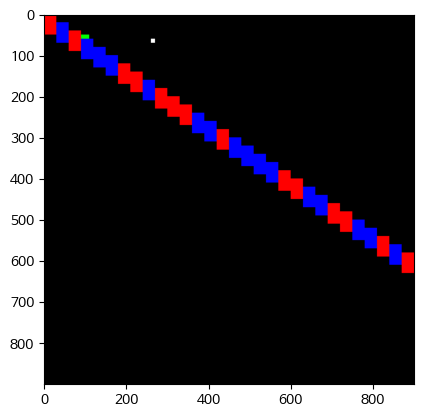

In [5]:
env.reset()
env.render(mode="human")
action = env.action_space.sample()
img, reward, done, info = env.step(1)
print(reward, done, info)
plt.figure()
plt.imshow(img)

# STEP. Ready Data

In [12]:
!pip install pykrx

In [2]:
### DATA
from pykrx import stock
import pandas as pd

df = stock.get_market_ohlcv("20210720", "20221010", "005930")
df = df[df.columns.tolist()[:-1]]
df.columns = ['open', 'high', 'low', 'close', 'volume']

df = df.reset_index(drop=True)
print(df.head(3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    open   high    low  close    volume
0  78500  79000  78400  79000  12456646
1  79000  79100  78500  78500  12355296
2  79000  79800  78900  79700  12618790


In [7]:
### init
time_step = 0
list_df = []

for i in range(7):
    list_df.append(df.iloc[i].tolist())

print(list_df[0])

[78500, 79000, 78400, 79000, 12456646]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
def loop_obs_df(list_df, time_step):
    list_df.pop(0)
    list_df.append(df.iloc[time_step + 7].tolist())
    time_step += 1
    return list_df, time_step

In [35]:
list_df, time_step = loop_obs_df(list_df, time_step)
print(list_df)

[[79000, 79100, 78500, 78500, 12355296], [79000, 79800, 78900, 79700, 12618790], [79700, 79900, 79200, 79300, 9098910], [79400, 79500, 78800, 78800, 10040975], [79200, 79400, 78500, 78500, 11427693], [78300, 79200, 78100, 79200, 12743417]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
len(list_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

In [ ]:


print(list_df)
list_df.pop(0)
print(list_df)

# STEP. ENV Code Test

In [8]:
import time

import numpy as np

import gym
from gym import error, spaces, utils
from gym.utils import seeding

import pygame, sys, time, random
from pygame.surfarray import array3d
from pygame import display

In [9]:
BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

In [33]:
class SnakeEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, obs_len=30):
        self.df = df
        self.obs_len=obs_len

        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(4) # Not use observation space(Handling Error) # We observate images
        self.frame_size_x = 900
        self.frame_size_y = 900
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))
        self.reset()
        self.STEP_LIMIT = 1000
        self.sleep = 0

        self.candle_width = self.frame_size_x // self.obs_len

    def get_obs_df_init(self):
        list_df = []

        for i in range(self.obs_len):
            list_df.append(self.df.iloc[i].tolist())

        return list_df


    def reset(self):
        self.game_window.fill(BLACK)
        self.snake_pos = [100, 50]
        self.snake_body = [[100, 50], [100-10, 50], [100-(2*10), 50]]
        #self.food_pos = self.spawn_food()
        self.food_spawn = True

        self.direction = "RIGHT"
        self.change_to = self.direction
        self.score = 0
        self.steps = 0

        img = array3d(display.get_surface())
        img = np.swapaxes(img, 0, 1)

        ###
        self.list_df = self.get_obs_df_init()


        return img

In [34]:
env = SnakeEnv(df=df,obs_len=30)

# snake_env.py

In [ ]:
import time

import numpy as np

import gym
from gym import error, spaces, utils
from gym.utils import seeding

import pygame, sys, time, random
from pygame.surfarray import array3d
from pygame import display

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

"""
df : pd.DataFrame whcich consist of columns(open, high, low, close, volume)
obs_len : What you want observate lenth from df

action_space : 3


obs_df : list of df(obs lenth)
get_obs_df_init : initiate obs_df
"""
class SnakeEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, obs_len=30):
        self.df = df  ###
        self.obs_len = obs_len  ###

        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(4) # Not use observation space(Handling Error) # We observate images
        self.frame_size_x = 900
        self.frame_size_y = 900
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))
        self.reset()
        self.STEP_LIMIT = 1000
        self.sleep = 0

        self.candle_width = self.frame_size_x // self.obs_len ###


    def step(self, action):
        scoreholder = self.score
        reward = 0
        self.direction = SnakeEnv.change_direction(action, self.direction)
        self.snake_pos = SnakeEnv.move(self.direction, self.snake_pos)
        self.snake_body.insert(0, list(self.snake_pos))

        reward = self.food_handler()

        self.update_game_state()

        reward, done = self.game_over(reward)

        img = self.get_image_array_from_game()
        info = {"score": self.score}
        self.steps += 1
        time.sleep(self.sleep)
        return img, reward, done, info


    @staticmethod
    def change_direction(action, direction):
        if action == 0 and direction != "DOWN":
            direction = 'UP'
        if action==1 and direction != "UP":
            direction = 'DOWN'
        if action==2 and direction != "RIGHT":
            direction = 'LEFT'
        if action==3 and direction != "LEFT":
            direction = 'RIGHT'
        return direction

    @staticmethod
    def move(direction, snake_pos):
        if direction == 'UP':
            snake_pos[1] -= 10
        if direction == 'DOWN':
            snake_pos[1] += 10
        if direction == 'LEFT':
            snake_pos[0] -= 10
        if direction == 'RIGHT':
            snake_pos[0] += 10
        return snake_pos


    def eat(self):
        return self.snake_pos[0] == self.food_pos[0] and self.snake_pos[1] == self.food_pos[1]

    def spawn_food(self):
        return [random.randrange(1, (self.frame_size_x//10)) * 10, random.randrange(1, (self.frame_size_y//10)) * 10]

    def food_handler(self):
        if self.eat():
            self.score += 1
            reward = 1
            self.food_spawn = False
        else:
            self.snake_body.pop()
            reward = 0

        if not self.food_spawn:
            self.food_pos = self.spawn_food()
        self.food_spawn = True

        return reward


    ###
    def update_game_state(self):
        self.game_window.fill(BLACK)
        for pos in self.snake_body:
            pygame.draw.rect(self.game_window, GREEN, pygame.Rect(pos[0], pos[1], 10, 10))

        pygame.draw.rect(self.game_window, WHITE, pygame.Rect(self.food_pos[0], self.food_pos[1], 10, 10))

        ###
        for idx in range(len(self.obs_df)):
            if self.obs_df[idx][0] <= self.obs_df[idx][3]:
                pygame.draw.rect(self.game_window, RED, pygame.Rect(idx*self.candle_width, idx*20, self.candle_width, 50))
            else:
                pygame.draw.rect(self.game_window, BLUE, pygame.Rect(idx*self.candle_width, idx*20, self.candle_width, 50))



    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        img = np.swapaxes(img, 0, 1)
        return img

    def game_over(self, reward):
        if self.snake_pos[0] < 0 or self.snake_pos[0] > self.frame_size_x-10:
            return -1, True
        if self.snake_pos[1] < 0 or self.snake_pos[1] > self.frame_size_y-10:
            return -1, True

        for block in self.snake_body[1:]:
            if self.snake_pos[0] == block[0] and self.snake_pos[1] == block[1]:
                return -1, True
        if self.steps >= 1000:
            return 0, True

        return reward, False


    ###
    def get_obs_df_init(self):
        obs_df = []

        for i in range(self.obs_len):
            obs_df.append(self.df.iloc[i].tolist())

        return obs_df



    def reset(self):
        self.game_window.fill(BLACK)
        self.snake_pos = [100, 50]
        self.snake_body = [[100, 50], [100-10, 50], [100-(2*10), 50]]
        self.food_pos = self.spawn_food()
        self.food_spawn = True

        self.direction = "RIGHT"
        self.change_to = self.direction
        self.score = 0
        self.steps = 0

        img = array3d(display.get_surface())
        img = np.swapaxes(img, 0, 1)

        ###
        self.obs_df = self.get_obs_df_init()


        return img


    def render(self, mode='human'):
        if mode == "human":
            display.update()

    def close(self):
        pass